# Predicting Rent Price of Houses

**Aim:** To build a machine learning model for predicting the monthly rent of homes based on different explanatory variables describing aspects of residential houses. 

<hr>

This note book is divided into 3 parts:

1. Data Analysis
2. [Feature Engineering](#Feature-Engineering)
3. [Model Building](#Training-The-Model )


The dataset and other information about the challenge can be found here [iNeuron](https://challenge-ineuron.in/mlchallenge.php#) ML Challenge 2.


***NOTE***: Dataset is too huge for Github. You may download the dataset and save it in the dataset/ folder in this repo

# 1. Data Analysis
## Contents:

- [Data Description](#Data-Description)
- [Missing values](#Missing-values)
    - _[Heat Map](#Heat-Map)_
    - _[Bar Plot](#Bar-Plot)_
    - _[Categorical Variables](#NA-Categorical-variables)_
    - _[Numerical Variables](#NA-Numerical-variables)_
- [Geographical Variables](#Geographical-variables)
- [Outliers](#Outliers)
    - _[Box Plot](#Box-Plot)_
    - _[Methods to detect outliers](#Let's-explore-these-outliers)_
- [Numerical Features](#Numerical-Features)
    - _[Discrete variables](#Discrete-variables)_
    - _[Continuous variables](#Continuous-variables)_
- [Distribution of the numerical variables](#Distribution-of-numerical-variables)
- [Categorical variables](#Categorical-variables)
    - _[Cardinality](#)_
    - _[Rare Labels](#Rare-labels)_
- [Correlation](#Correlation)
- [Conclusion](#Conclusion)

In [1]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
#Importing Data
data = pd.read_csv('dataset/housing_train.csv')
data.shape

(265190, 22)

### Data Description

In [3]:
data.head()

id                                                url      region  \
0  7039061606  https://bham.craigslist.org/apa/d/birmingham-h...  birmingham   
1  7041970863  https://bham.craigslist.org/apa/d/birmingham-w...  birmingham   
2  7041966914  https://bham.craigslist.org/apa/d/birmingham-g...  birmingham   
3  7041966936  https://bham.craigslist.org/apa/d/birmingham-f...  birmingham   
4  7041966888  https://bham.craigslist.org/apa/d/birmingham-2...  birmingham   

                    region_url  price       type  sqfeet  beds  baths  \
0  https://bham.craigslist.org   1195  apartment    1908     3    2.0   
1  https://bham.craigslist.org   1120  apartment    1319     3    2.0   
2  https://bham.craigslist.org    825  apartment    1133     1    1.5   
3  https://bham.craigslist.org    800  apartment     927     1    1.0   
4  https://bham.craigslist.org    785  apartment    1047     2    1.0   

   cats_allowed  dogs_allowed  smoking_allowed  wheelchair_access  \
0             1             1                1                  0   
1             1             1                1                  0   
2             1             1                1                  0   
3             1             1                1                  0   
4             1             1                1                  0   

   electric_vehicle_charge  comes_furnished  laundry_options  \
0                        0                0  laundry on site   
1                        0                0  laundry on site   
2                        0                0  laundry on site   
3                        0                0  laundry on site   
4                        0                0  laundry on site   

      parking_options                                          image_url  \
0      street parking  https://images.craigslist.org/00L0L_80pNkyDeG0...   
1  off-street parking  https://images.craigslist.org/00707_uRrY9CsNMC...   
2      street parking  https://images.craigslist.org/00h0h_b7Bdj1NLBi...   
3      street parking  https://images.craigslist.org/00808_6ghZ8tSRQs...   
4      street parking  https://images.craigslist.org/00y0y_21c0FOvUXm...   

                                         description      lat     long state  
0  Apartments In Birmingham AL Welcome to 100 Inv...  33.4226 -86.7065    al  
1  Find Your Way to Haven Apartment Homes Come ho...  33.3755 -86.8045    al  
2  Apartments In Birmingham AL Welcome to 100 Inv...  33.4226 -86.7065    al  
3  Apartments In Birmingham AL Welcome to 100 Inv...  33.4226 -86.7065    al  
4  Apartments In Birmingham AL Welcome to 100 Inv...  33.4226 -86.7065    al

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       265190 non-null  int64  
 1   url                      265190 non-null  object 
 2   region                   265190 non-null  object 
 3   region_url               265190 non-null  object 
 4   price                    265190 non-null  int64  
 5   type                     265190 non-null  object 
 6   sqfeet                   265190 non-null  int64  
 7   beds                     265190 non-null  int64  
 8   baths                    265190 non-null  float64
 9   cats_allowed             265190 non-null  int64  
 10  dogs_allowed             265190 non-null  int64  
 11  smoking_allowed          265190 non-null  int64  
 12  wheelchair_access        265190 non-null  int64  
 13  electric_vehicle_charge  265190 non-null  int64  
 14  come

In [5]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [6]:
data.describe()

id         price        sqfeet           beds          baths  \
count  2.651900e+05  2.651900e+05  2.651900e+05  265190.000000  265190.000000   
mean   7.040888e+09  1.227285e+04  1.093678e+03       1.912414       1.483468   
std    8.778930e+06  5.376352e+06  2.306888e+04       3.691900       0.630208   
min    7.003808e+09  0.000000e+00  0.000000e+00       0.000000       0.000000   
25%    7.035963e+09  8.170000e+02  7.520000e+02       1.000000       1.000000   
50%    7.043109e+09  1.060000e+03  9.500000e+02       2.000000       1.000000   
75%    7.048362e+09  1.450000e+03  1.156000e+03       2.000000       2.000000   
max    7.051263e+09  2.768307e+09  8.388607e+06    1100.000000      75.000000   

        cats_allowed   dogs_allowed  smoking_allowed  wheelchair_access  \
count  265190.000000  265190.000000    265190.000000      265190.000000   
mean        0.716822       0.696550         0.733896           0.078759   
std         0.450543       0.459749         0.441920           0.269362   
min         0.000000       0.000000         0.000000           0.000000   
25%         0.000000       0.000000         0.000000           0.000000   
50%         1.000000       1.000000         1.000000           0.000000   
75%         1.000000       1.000000         1.000000           0.000000   
max         1.000000       1.000000         1.000000           1.000000   

       electric_vehicle_charge  comes_furnished            lat           long  
count            265190.000000    265190.000000  263771.000000  263771.000000  
mean                  0.014360         0.048644      37.208855     -92.398149  
std                   0.118968         0.215124       5.659648      17.370780  
min                   0.000000         0.000000     -43.533300    -163.894000  
25%                   0.000000         0.000000      33.508500    -104.704000  
50%                   0.000000         0.000000      37.984900     -86.478300  
75%                   0.000000         0.000000      41.168400     -81.284600  
max                   1.000000         1.000000     102.036000     172.633000

### Missing values


In [7]:
all_data_na = (data.isnull().sum()/len(data)*100).sort_values(ascending=False)[:30]
all_data_na.head(10)

parking_options    35.874279
laundry_options    20.480033
lat                 0.535088
long                0.535088
description         0.000754
state               0.000377
beds                0.000000
url                 0.000000
region              0.000000
region_url          0.000000
dtype: float64

<hr>

Variables containing missing values:
- parking_options (36%)
- laundry_options (20%)
- lat (0.5%)
- long (0.5%)
- description & state (negligible)

### Heat Map

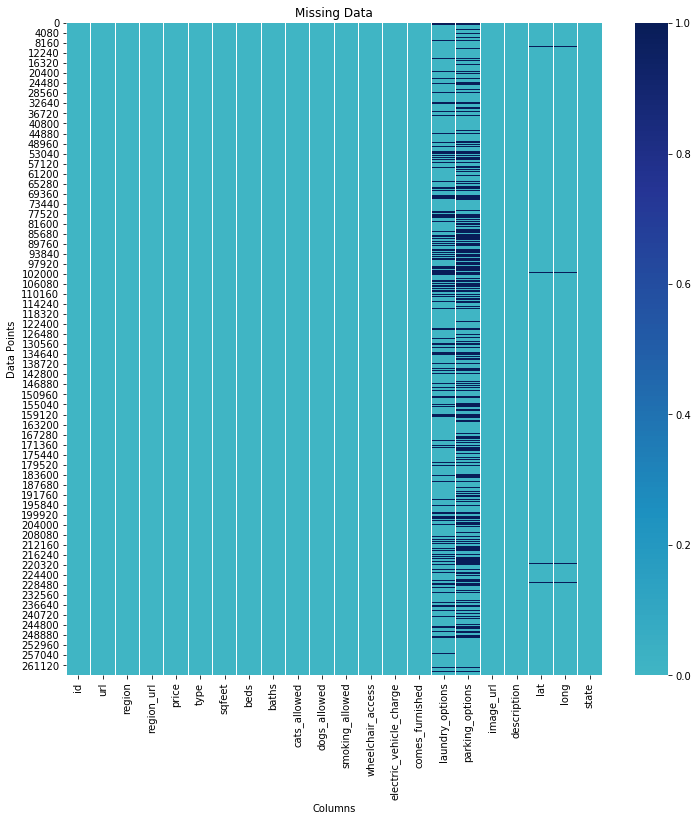

In [8]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.isnull(), ax=ax, cmap="YlGnBu", center=0).set(
            title = 'Missing Data', 
            xlabel = 'Columns', 
            ylabel = 'Data Points');

In [9]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
data[vars_with_na].isnull().mean()

laundry_options    0.204800
parking_options    0.358743
description        0.000008
lat                0.005351
long               0.005351
state              0.000004
dtype: float64

The dataset contains a few variables with missing values. This would be accounted for in the while feature engineering.

#### Relationship between values being missing and price

Let's evaluate the price of the house in those observations where the information is missing, for each variable.

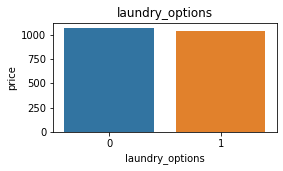

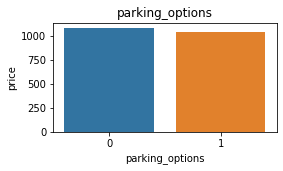

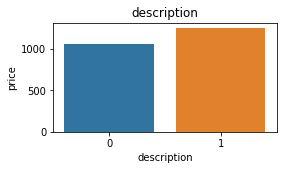

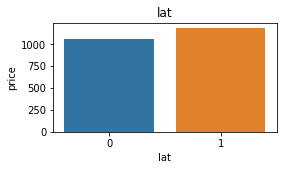

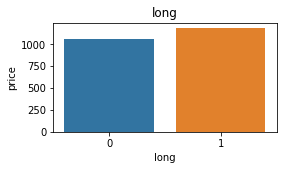

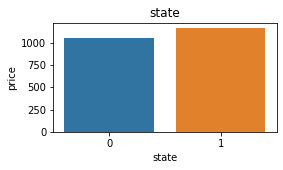

In [10]:
def analyse_na_value(df, var):
    df = df.copy()
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isna(), 1, 0)
    grs = df.groupby(var)['price'].median().reset_index()
    plt.figure(figsize=(4,2))
    sns.barplot(x=grs[var], y=grs['price'])
    plt.title(var)
    plt.show()


# let's run the function on each variable with missing data
for var in vars_with_na:
    analyse_na_value(data, var)

The average rent price in houses where the information is missing, differs from the average rent price in houses where information exists. 

We will capture this information when we engineer the variables in our next pipeline

#### NA-Categorical variables

In [11]:
# make a list of the categorical variables that contain missing values

vars_with_na = [
    var for var in data.columns
    if data[var].isnull().sum() > 0 and data[var].dtypes == 'O'
]
print(vars_with_na)
data[vars_with_na].isna().mean()

['laundry_options', 'parking_options', 'description', 'state']


laundry_options    0.204800
parking_options    0.358743
description        0.000008
state              0.000004
dtype: float64

In [12]:
data[vars_with_na].head()

laundry_options     parking_options  \
0  laundry on site      street parking   
1  laundry on site  off-street parking   
2  laundry on site      street parking   
3  laundry on site      street parking   
4  laundry on site      street parking   

                                         description state  
0  Apartments In Birmingham AL Welcome to 100 Inv...    al  
1  Find Your Way to Haven Apartment Homes Come ho...    al  
2  Apartments In Birmingham AL Welcome to 100 Inv...    al  
3  Apartments In Birmingham AL Welcome to 100 Inv...    al  
4  Apartments In Birmingham AL Welcome to 100 Inv...    al

***Description***

In [13]:
data.description[0]

'Apartments In Birmingham AL Welcome to 100 Inverness Apartment Homes, a luxury apartment community tucked away into one of the most coveted locations in the city for Birmingham apartments. Find stylish one-, two-, and three-bedroom apartment floor plans tailored to your wants and needs, complete with the amenities that are important to you. Our layouts come with just enough variety to enable you to make it your own haven unlike any other. Get inspired by our photos and the serenity of the nature surrounding you to let your aesthetic come together with our stylish, modern designs for a home you wonâ\x80\x99t be able to wait to show off to your guests. Even beyond style, our pet-friendly apartment community is also all about functionality! Some of our homes come with washer and dryer hookups, wood burning fireplaces, hardwood floors, and a private patio or balcony. All of our residents can make use of oversized walk-in closets, air conditioning, garages, a business center, on-site manag

While going through the description for the house records, I found some interesting information that can be used as a feature in determining the target. Like info about grilling, pool, fireplace etc can be a useful feature. We will look about this more in data cleaning pipeline

In [14]:
data.groupby('region')['state'].value_counts()

region                  state
SF bay area             ca       2327
akron / canton          oh       1532
albany                  ny       1244
                        ga        846
albuquerque             nm       2144
                                 ... 
winston-salem           nc       2123
worcester / central MA  ma       1452
yuba-sutter             ca        152
yuma                    az        215
zanesville / cambridge  oh          3
Name: state, Length: 310, dtype: int64

The state is highly related to the region. So filing the missing values of state with the mode value of state for that region.

***laundry_options***

In [15]:
data.groupby('type')['laundry_options'].value_counts()

type             laundry_options   
apartment        w/d in unit           73426
                 laundry on site       36440
                 w/d hookups           34418
                 laundry in bldg       25730
                 no laundry on site     1957
assisted living  laundry on site           1
condo            w/d in unit            2807
                 laundry in bldg         566
                 w/d hookups             332
                 laundry on site         324
                 no laundry on site       33
cottage/cabin    w/d in unit             303
                 laundry on site         119
                 no laundry on site      107
                 w/d hookups              78
                 laundry in bldg          31
duplex           w/d hookups            1340
                 w/d in unit            1326
                 laundry on site         242
                 laundry in bldg         219
                 no laundry on site      127
flat             w/

Filling in the missing laundry_options with the mode value of laundry_options for the type of the house

***parking_options***

In [16]:
data.groupby('type')['parking_options'].value_counts()

type       parking_options   
apartment  off-street parking    74713
           carport               25035
           attached garage       13397
           detached garage        9415
           street parking         8672
                                 ...  
townhouse  carport                1072
           street parking          515
           detached garage         363
           no parking                6
           valet parking             3
Name: parking_options, Length: 69, dtype: int64

Same as landry_options, filling in the missing parking_options with the mode value of parking_options for the type of the house.

We will fill in the missing values in the notebook for Feature Engineering Pipeline

### NA-Numerical variables


In [17]:
# make a list with the numerical variables that contain missing values
vars_with_na = [
    var for var in data.columns
    if data[var].isnull().sum() > 0 and data[var].dtypes != 'O'
]
print(vars_with_na)
# print percentage of missing values per variable
data[vars_with_na].isnull().mean()

['lat', 'long']


lat     0.005351
long    0.005351
dtype: float64

In [18]:
# Lat
data.groupby('region')['lat'].value_counts()

region                  lat    
SF bay area             37.7740    28
                        38.0087    21
                        37.2458    20
                        37.7752    17
                        38.1199    17
                                   ..
yuma                    32.7939     1
                        33.9776     1
zanesville / cambridge  39.8993     1
                        39.9274     1
                        40.1647     1
Name: lat, Length: 49528, dtype: int64

In [19]:
# Long
data.groupby('region')['long'].value_counts()

region                  long     
SF bay area             -122.3910    50
                        -122.2670    28
                        -122.2560    28
                        -122.0180    27
                        -121.9840    26
                                     ..
yuma                    -114.3850     1
                        -113.5030     1
zanesville / cambridge  -82.1295      1
                        -82.0041      1
                        -81.8345      1
Name: long, Length: 44898, dtype: int64

<hr>

As we know lattitudes and longitudes tends to correspond to the region. So it will be appropriate to fill missing lattitudes and longitudes with the mode value for the region.

### Boolean Variables
Extracting the boolean variables

In [20]:
bool_vars = [var for var in data.columns if data[var].nunique()==2]

data[bool_vars].head()

cats_allowed  dogs_allowed  smoking_allowed  wheelchair_access  \
0             1             1                1                  0   
1             1             1                1                  0   
2             1             1                1                  0   
3             1             1                1                  0   
4             1             1                1                  0   

   electric_vehicle_charge  comes_furnished  
0                        0                0  
1                        0                0  
2                        0                0  
3                        0                0  
4                        0                0

In [21]:
# make list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O' and var not in bool_vars]

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  7


id  price  sqfeet  beds  baths      lat     long
0  7039061606   1195    1908     3    2.0  33.4226 -86.7065
1  7041970863   1120    1319     3    2.0  33.3755 -86.8045
2  7041966914    825    1133     1    1.5  33.4226 -86.7065
3  7041966936    800     927     1    1.0  33.4226 -86.7065
4  7041966888    785    1047     2    1.0  33.4226 -86.7065

From the above view of the dataset, we notice the variable id, which is an indicator of the house. We will not use this variable to make our predictions, as there is one different value of the variable per each row, i.e., each house in the dataset. See below:

In [22]:
print('Number of House Id labels: ', len(data.id.unique()))
print('Number of Houses in the Dataset: ', len(data))

Number of House Id labels:  265190
Number of Houses in the Dataset:  265190


Same goes for url and image_url, each house have different set of values for these features

### Geographical variables
Plotting lattitude and longitude to get more insights

**Scatter Plot**

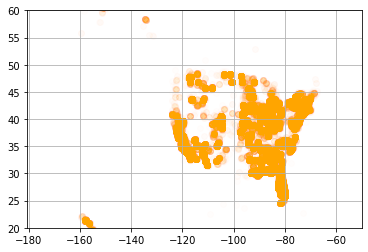

In [23]:
plt.scatter(x=data['long'], y=data['lat'],alpha=0.01,c='orange')
plt.xlim(right=-50)
plt.ylim(bottom=20,top=60)
plt.grid()
plt.show()

**Shapely geometry**

## Outliers

Extreme values may affect the performance of a linear model. Let's find out if we have any in our variables.

**Box Plot**

Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

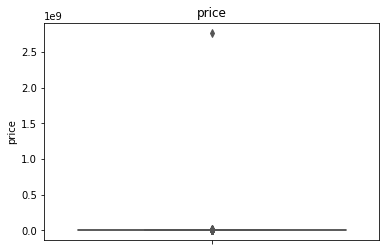

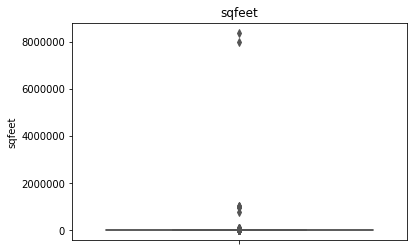

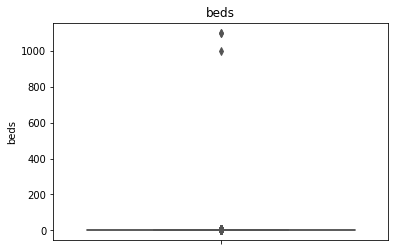

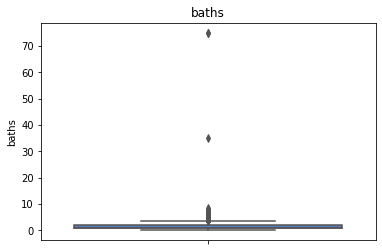

In [24]:
# let's make boxplots to visualise outliers in the continuous variables

out_vars = ['price','sqfeet','beds','baths']

def find_outliers(df, var):
    df = df.copy()

    # log transform the variable
    df[var] = np.log1p(df[var])
    ax = sns.boxplot(x=data[var], palette="muted", orient="vertical")
    plt.title(var)
    plt.ylabel(var)
    plt.show()


for var in out_vars:
    find_outliers(data, var)

The majority of the continuous variables seem to contain outliers. Outliers tend to affect the performance of linear model. So it is worth spending some time understanding if removing outliers will add performance value to our  final machine learning model.

#### Let's explore these outliers

### IQR

In [25]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

### Standard Deviation


In [26]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

#### Price outliers

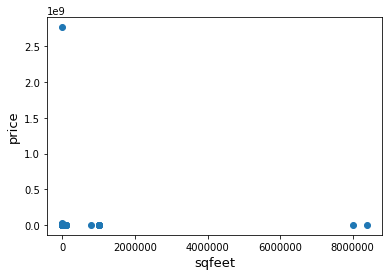

In [27]:
fig, ax = plt.subplots()
ax.scatter(x = data['sqfeet'], y = data['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('sqfeet', fontsize=13)
plt.show()

We can see at the bottom right two with extremely large sqfeet that are of a low price. Also one at the top left with extremely small sqfeet that are of high price. These values are huge oultliers.

**IQR**

In [28]:
out_iqr(data, 'price')

The IQR is 633.0
The lower bound value is -132.5
The upper bound value is 2399.5
Total number of outliers are 13423


#### STD

In [29]:
out_std(data,'price')

The lower bound value is -16116782.293358017
The upper bound value is 16141328.000541545
Total number of outliers are 4


### sqfeet

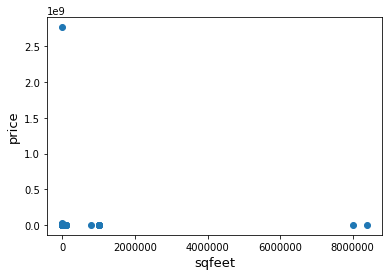

In [30]:
fig, ax = plt.subplots()
ax.scatter(x = data['sqfeet'], y = data['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('sqfeet', fontsize=13)
plt.show()

We can see at the bottom right two with extremely large sqfeet that are of a low price. Also one at the top left with extremely small sqfeet that are of high price. These values are huge oultliers.

In [31]:
# IQR
out_iqr(data, 'sqfeet')

The IQR is 404.0
The lower bound value is 146.0
The upper bound value is 1762.0
Total number of outliers are 11212


In [32]:
# STD
out_std(data,'sqfeet')

The lower bound value is -68112.94842085999
The upper bound value is 70300.30499539146
Total number of outliers are 15


###   Beds

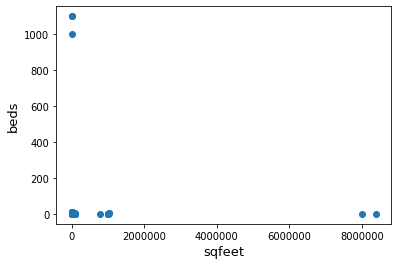

In [33]:
fig, ax = plt.subplots()
ax.scatter(x = data['sqfeet'], y = data['beds'])
plt.ylabel('beds', fontsize=13)
plt.xlabel('sqfeet', fontsize=13)
plt.show()

In [34]:
# IQR
out_iqr(data, 'beds')

The IQR is 1.0
The lower bound value is -0.5
The upper bound value is 3.5
Total number of outliers are 10017


In [35]:
# STD
out_std(data,'beds')

The lower bound value is -9.16328511532581
The upper bound value is 12.988112597508394
Total number of outliers are 3


### Numerical Features

#### Discrete variables

Let's go ahead and find which variables are discrete, i.e., show a finite number of values

In [36]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in ['id', 'price']]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  2


In [37]:
# let's visualise the discrete variables

data[discrete_vars].head()

beds  baths
0     3    2.0
1     3    2.0
2     1    1.5
3     1    1.0
4     2    1.0

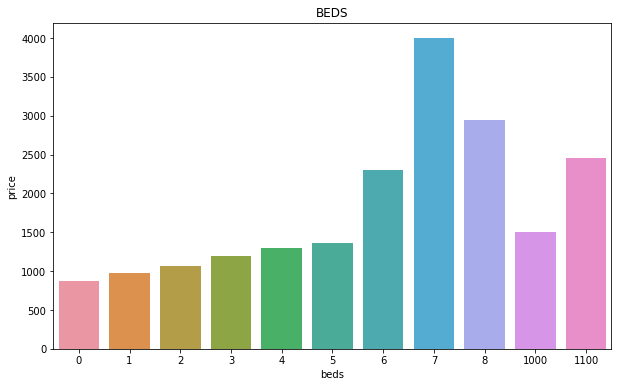

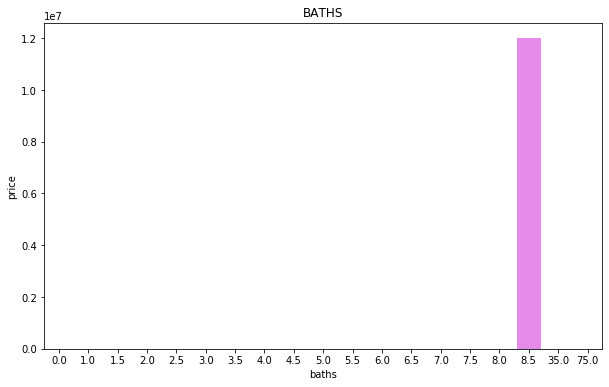

In [38]:
def analyse_discrete(df, var):
    df = df.copy()
    grs = df.groupby(var)['price'].median().reset_index()
    plt.figure(figsize=(10,6))
    sns.barplot(x=grs[var], y=grs['price'])
    plt.title(var.upper())
    plt.show()
    
    
for var in discrete_vars:
    analyse_discrete(data, var)

There tend to be a relationship between the variables values and the price, but this relationship is not always monotonic. 

For example, for beds, there is a monotonic relationship: the higher the quantity, the higher the price.  

However, for baths, the relationship is not monotonic. Clearly, some baths number, like 8.5, correlate with higher sale prices, but higher values do not necessarily do so. We need to be careful on how we engineer these variables to extract maximum value for a linear model.

### Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all those that are not temporal or discrete variables in our dataset.

In [39]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars+['id']]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  4


In [40]:
# let's visualise the continuous variables

data[cont_vars].head()

price  sqfeet      lat     long
0   1195    1908  33.4226 -86.7065
1   1120    1319  33.3755 -86.8045
2    825    1133  33.4226 -86.7065
3    800     927  33.4226 -86.7065
4    785    1047  33.4226 -86.7065

### Distribution of numerical variables

#### **Dist Plot before log transformation**

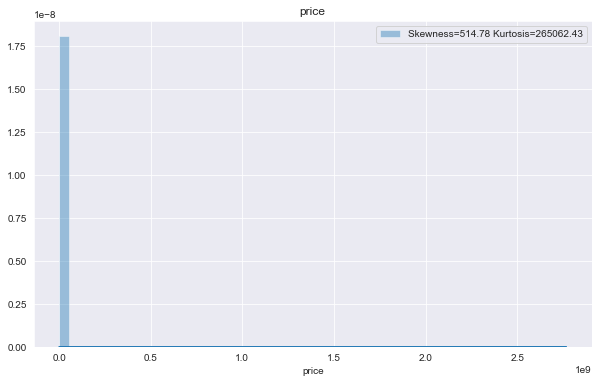

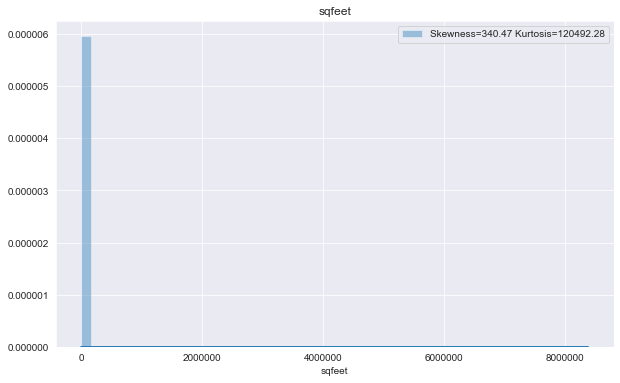

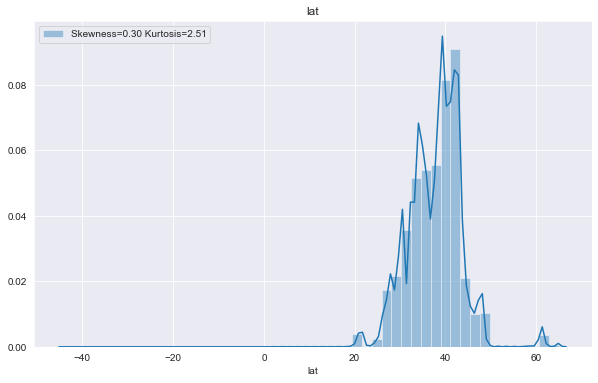

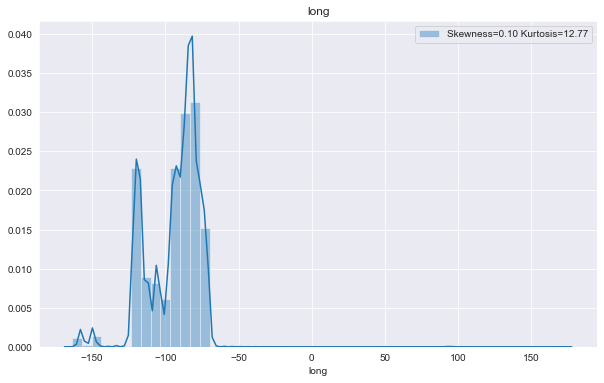

In [41]:
# Let's analyse the distributions of these variables
def analyse_continuous(df, var):
    df = df.copy()  
    df = df.dropna(axis=0)
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.distplot(df[var], hist=True)
    plt.legend(['Skewness={:.2f} Kurtosis={:.2f}'.format(
            data[var].skew(), 
            data[var].kurt())
        ],
        loc='best')
    plt.title(var)
    plt.show()

for var in cont_vars:
    analyse_continuous(data, var)

The variables are not normally distributed, including the target variable 'price'. 

To maximise performance of linear models, we need to account for non-Gaussian distributions. We will transform our variables in the next lecture / video, during our feature engineering step.

Let's evaluate if a logarithmic transformation of the variables returns values that follow a normal distribution:

**Dist Plot after log transformation**

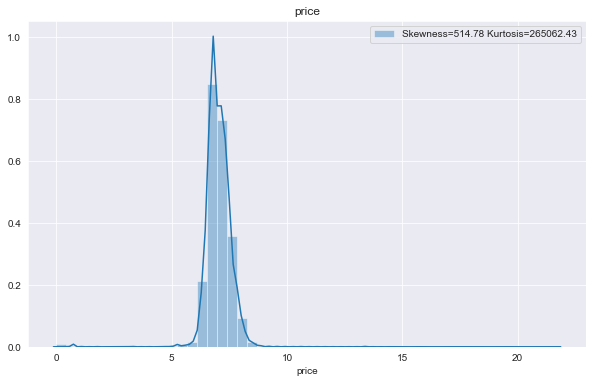

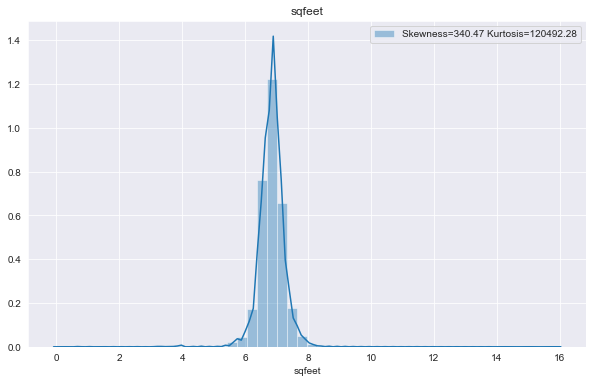

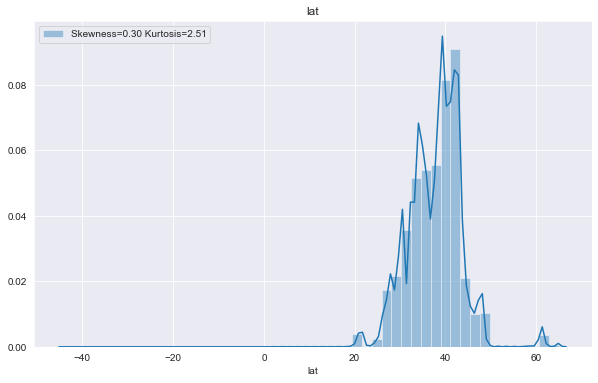

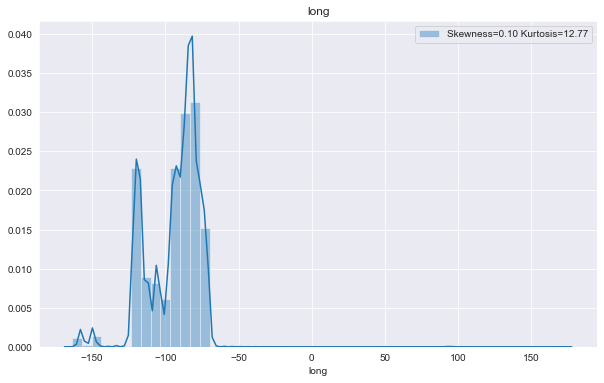

In [42]:
# Let's go ahead and analyse the distributions of these variables
# after applying a logarithmic transformation
def analyse_transformed_continuous(df, var):
    df = df.copy()
    df = df.dropna(axis=0)

    # log does not take 0 or negative values, so let's be
    # careful and skip those variables
    if var == 'lat' or var == 'long':
        pass
    else:
        # log transform the variable
        df[var] = np.log1p(df[var])
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.distplot(df[var], hist=True)
    plt.legend(['Skewness={:.2f} Kurtosis={:.2f}'.format(
            data[var].skew(), 
            data[var].kurt())
        ],
        loc='best')
    plt.title(var)
    plt.show()


for var in cont_vars:
    analyse_transformed_continuous(data, var)

We get a better spread of the values for most variables when we use the logarithmic transformation. This engineering step will most likely add performance value to our final model.

From the previous plots, we observe some monotonic associations between price and the variables to which we applied the log transformation, for example 'sqfeet'.

### Categorical variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [43]:
# capture categorical variables in a list
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  9


In [44]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

url      region  \
0  https://bham.craigslist.org/apa/d/birmingham-h...  birmingham   
1  https://bham.craigslist.org/apa/d/birmingham-w...  birmingham   
2  https://bham.craigslist.org/apa/d/birmingham-g...  birmingham   
3  https://bham.craigslist.org/apa/d/birmingham-f...  birmingham   
4  https://bham.craigslist.org/apa/d/birmingham-2...  birmingham   

                    region_url       type  laundry_options  \
0  https://bham.craigslist.org  apartment  laundry on site   
1  https://bham.craigslist.org  apartment  laundry on site   
2  https://bham.craigslist.org  apartment  laundry on site   
3  https://bham.craigslist.org  apartment  laundry on site   
4  https://bham.craigslist.org  apartment  laundry on site   

      parking_options                                          image_url  \
0      street parking  https://images.craigslist.org/00L0L_80pNkyDeG0...   
1  off-street parking  https://images.craigslist.org/00707_uRrY9CsNMC...   
2      street parking  https://images.craigslist.org/00h0h_b7Bdj1NLBi...   
3      street parking  https://images.craigslist.org/00808_6ghZ8tSRQs...   
4      street parking  https://images.craigslist.org/00y0y_21c0FOvUXm...   

                                         description state  
0  Apartments In Birmingham AL Welcome to 100 Inv...    al  
1  Find Your Way to Haven Apartment Homes Come ho...    al  
2  Apartments In Birmingham AL Welcome to 100 Inv...    al  
3  Apartments In Birmingham AL Welcome to 100 Inv...    al  
4  Apartments In Birmingham AL Welcome to 100 Inv...    al

#### Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

In [45]:
data[cat_vars].nunique().sort_values(ascending=False)

url                265190
description        195471
image_url          125141
region_url            305
region                298
state                  38
type                   12
parking_options         7
laundry_options         5
dtype: int64

In [46]:
data[cat_vars].nunique() / len(data)

url                1.000000
region             0.001124
region_url         0.001150
type               0.000045
laundry_options    0.000019
parking_options    0.000026
image_url          0.471892
description        0.737098
state              0.000143
dtype: float64

Variables like url, image_url, description has high cardinality. It is worth mentioning that each of houses may have differt values for these variables. Hence the high cardinality. So it okay to remove these. Also region_url contains the region, so dropping region_url will not affect our model.

In [47]:
# recapture categorical variables in a list
cat_vars = [var for var in cat_vars if var not in ['url', 'image_url', 'description', 'region_url']]

data[cat_vars].nunique()

region             298
type                12
laundry_options      5
parking_options      7
state               38
dtype: int64

All the categorical variables show low cardinality(except region), this means that they have only few different labels. That is good as we won't need to tackle cardinality during our feature engineering lecture.

#### Rare labels

Let's go ahead and investigate now if there are labels that are present only in a small number of houses:

In [48]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['price'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations


for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))


region
SF bay area               0.008775
akron / canton            0.005777
albany                    0.007881
albuquerque               0.008085
ames                      0.001358
                            ...   
winston-salem             0.008006
worcester / central MA    0.005475
yuba-sutter               0.000573
yuma                      0.000811
zanesville / cambridge    0.000011
Name: price, Length: 293, dtype: float64
type
assisted living    0.000004
cottage/cabin      0.002647
flat               0.001316
in-law             0.000547
land               0.000015
loft               0.001927
Name: price, dtype: float64
laundry_options
no laundry on site    0.00962
Name: price, dtype: float64
parking_options
no parking       0.00744
valet parking    0.00046
Name: price, dtype: float64
state
ak    0.008179
dc    0.009435
de    0.007723
hi    0.006938
me    0.001584
mo    0.008138
mt    0.005049
nh    0.006641
ok    0.000185
or    0.000166
Name: price, dtype: float64


Some of the categorical variables show multiple labels that are present in less than 1% of the houses. We will engineer these variables in our next notebook. Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models. That is why we want to remove them.

#### Frequent Labels


In [49]:
def find_frequent_labels(df, var, rare_perc):
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset
    df = df.copy()
    tmp = df.groupby(var)['price'].count() / len(df)
    return tmp[tmp > rare_perc].index.values

frequent_ls = {}
for var in cat_vars:
    frequent_ls[var] = find_frequent_labels(data, var, 0.01)
    
# frequent_ls

In [50]:
grdsp = data.groupby(["type"])[["price"]].mean().reset_index()

fig = px.pie(grdsp,
             values="price",
             names="type",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

We can see that the majority of the houses are of type apartment with around 50.2% of the total records.<br>
The mean price for the type apartment is around 14,544.

### State

In [51]:
data['state'].value_counts().sort_values(ascending=False)

ca    33085
fl    31929
nc    18628
mi    14529
ga    13841
co    11308
ny     9991
il     9706
ks     7910
ia     7488
mn     7468
md     7451
la     7304
az     6752
oh     6558
in     6416
al     6198
nj     5711
ky     5419
ms     4973
ma     4926
id     4466
ct     3765
nd     3428
ar     3149
nm     2917
nv     2846
ne     2697
dc     2502
ak     2169
mo     2158
de     2048
hi     1840
nh     1761
mt     1339
me      420
ok       49
or       44
Name: state, dtype: int64

***Scatter Plot***

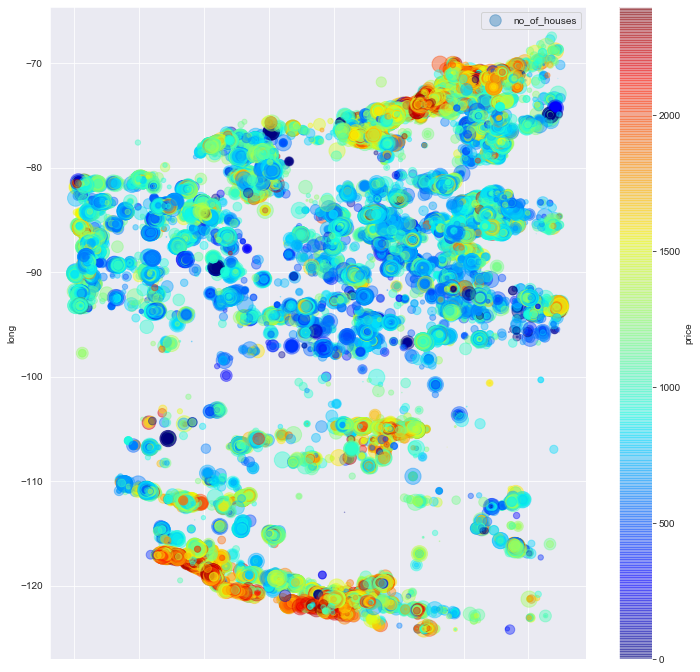

In [52]:
df = data[((data['long']>-125) & (data['long']<-45)) & ((data['lat']>30) & (data['lat']<45))]
df = df[df.price<2400]
df.plot(kind="scatter", x="lat", y="long", alpha=0.4, 
        s=df["state"].value_counts()/100, label="no_of_houses", 
        c="price", cmap=plt.get_cmap("jet"), colorbar=True,
        figsize=(12,12))

plt.legend()

The radius of each circle represents the state’s house count (option s), and the color represents the price (option c). The ranges from blue (low values) to red (high prices):

### Region


In [53]:
data['region'].value_counts().sort_values(ascending=False)

jacksonville              4246
rochester                 3677
fayetteville              3652
omaha / council bluffs    2727
denver                    2671
                          ... 
mansfield                    3
kansas city                  3
northwest OK                 2
texoma                       1
east oregon                  1
Name: region, Length: 298, dtype: int64

***Scatter Plot***

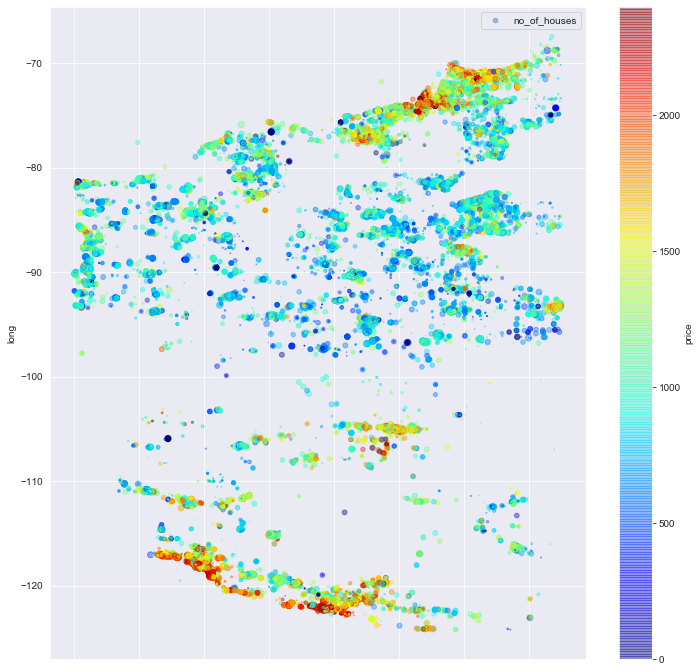

In [54]:
df = data[((data['long']>-125) & (data['long']<-45)) & ((data['lat']>30) & (data['lat']<45))]
df = df[df.price<2400]
df.plot(kind="scatter", x="lat", y="long", alpha=0.4, 
        s=df["region"].value_counts()/100, label="no_of_houses", 
        c="price", cmap=plt.get_cmap("jet"), colorbar=True,
        figsize=(12,12))

plt.legend()

The radius of each circle represents the region’s house count (option s), and the color represents the price (option c). The ranges from blue (low values) to red (high prices):

### Correlation

***Correlation Heatmap***

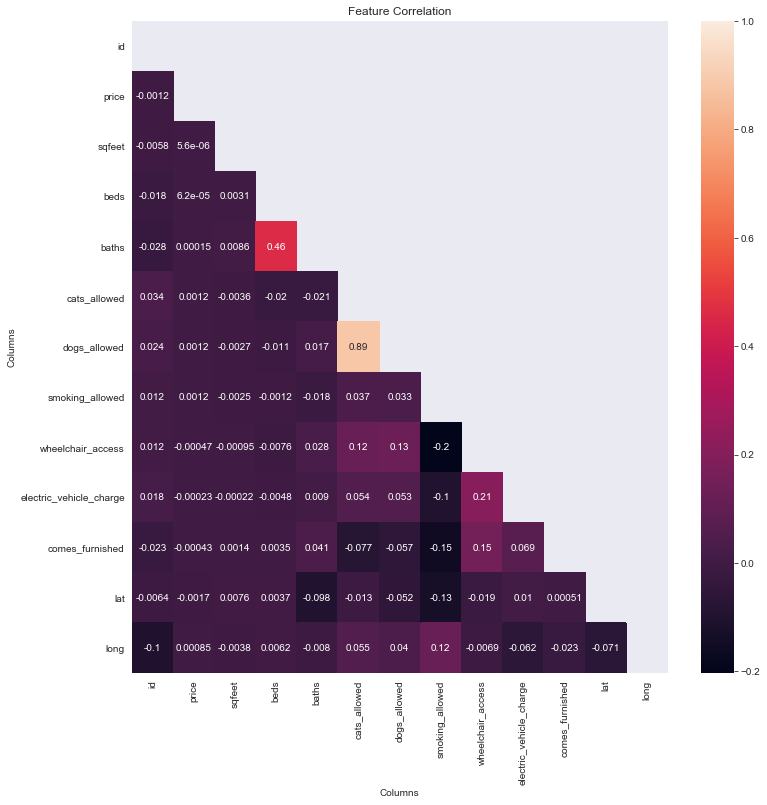

In [55]:
corr_matrix = data.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

fig, ax = plt.subplots(figsize=(12,12)) 

sns.heatmap(corr_matrix, 
            annot=True, 
            mask=mask,
            ax=ax).set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')

ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

There's hardly any correlation among the independent and dependent features.

Some insights from the above correlation heatmap:

1. expected stronge correlation between beds and baths
2. unexpected correlation between smoking_allowed and lat
3. unexpected correlation between smoking_allowed and infant_mortality
4. expected stronge correlation between cats_allowed and dogs_allowed

<hr>

## Conclusion
<hr>

### 1. Data Description:

The house price dataset contains 265,190 rows, i.e., houses, and 22 columns, i.e., variables. <br>
There are 13 numerical features and 9 categorical features.

### 2. Missing Values:
Following variables consist missing values.
- parking_options (36%)
- laundry_options (20%)
- lat (0.5%)
- long (0.5%)
- description & state (nominal percentage)

**Imputate missing values:**

variables | imputation 
--- | ---
parking_options | mode value of the parking_options for the respective house type
laundry_options | mode value of the laundry_options for the respective house type
lat | mode value of the lattitude for the respective house region
long | mode value of the longitude for the respective house region
state | drop records
description | drop records


***Note***: Description column can be explored more to get intriguing new features. For example: having pool, fireplace, grilling place, gym nearby etc.

### 3. Outliers

All the numerical variables contain huge outliers. While doing EDA, we decided to remove the outliers with the help of interquartile range.

variables | no of outliers | upper bound | lower bound 
--- | --- | --- | ---
price | 13423 | 2400 | 1
sqfeet | 11212 | 1762 | 146
beds | 10017 | 3 | 1
baths | 1459 | 3 | 1
lat | 3148 | 53 | 23
long | 3110 | -45 | -142


### 4. Numerical variables:

Numerical variables are: <br>
    
    ['price', 'sqfeet', 'beds', 'baths', 'lat', 'long']

Boolean variables are: <br>
    
    ['cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 
    'comes_furnished']

Discrete variables are: <br>
    
    ['beds', 'baths']

Continuous variables are: <br>
    
    ['price', 'sqfeet', 'lat', 'long']

### 5. Distribution of Numerical Variables

All the numerical variables, except lat and long are skewed. Log transformation found to be useful while analysis the data.

### 6. Categorical Variables

The categorical features are: <br>

    ['region', 'type', 'laundry_options', 'parking_options', 'state']
       
These variables contain all text: <br>
    
    ['url', 'region_url', 'image_url', 'description']

The frequent labels for the categorical variables are: <br>

    {
    'region': 
        ['denver', 'fayetteville', 'jacksonville', 'omaha / council bluffs', 'rochester'],
     'type': 
        ['apartment', 'condo', 'duplex', 'house', 'manufactured', 'townhouse'],
     'laundry_options': 
        ['laundry in bldg', 'laundry on site', 'w/d hookups', 'w/d in unit'],  
     'parking_options': 
        ['attached garage', 'carport', 'detached garage', 'off-street parking', 'street parking'],
     'state': 
        ['al', 'ar', 'az', 'ca', 'co', 'ct', 'fl', 'ga', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 
        'ma', 'md', 'mi', 'mn', 'ms', 'nc', 'nd', 'ne', 'nj', 'nm', 'nv', 'ny', 'oh']
    }
    
### 7. Relationship between independent and dependent variable

We did not notice much relationship among the features. We look into this topic in our next notebook, i.e. Feature Engineering Pipelin.

In the next notebook, we will transform these strings / labels into numbers, so that we capture this information and transform it into a monotonic relationship between the category and the house price.

 <hr>
 
 # Feature Engineering
 
 <hr>
 
## House Prices dataset: Feature Engineering

In the following cells, we will engineer / pre-process the variables of the House Rent Dataset from iNeuron. We will engineer the variables so that we tackle:

- Data Cleaning
    - Removing Outliers
    - Extracting new features
- Missing values
- Log transformation
- Categorical variables: remove rare labels
- Categorical variables: convert strings to numbers



In [56]:
# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler


## Data Cleaning

Getting appropriate data types. For example baths have a dtype of float, and it contains some decimal values. But it is a quantitative variable. So transforming it to remove decimal.

In [57]:
data['baths'] = np.ceil(data['baths'])
data['baths'] = data['baths'].astype(np.int)

## Outliers

In EDA, we decided to remove outliers according to the upper and lower bound of its interquartile range.

In [58]:
price_upper, price_lower = 2400, 1
sqfeet_upper, sqfeet_lower = 1762, 1
beds_upper, beds_lower = 3, 1
baths_upper, baths_lower = 3, 1

data = data[(data['price'] <= price_upper) & (data['price'] >= price_lower)]
data = data[(data['sqfeet'] <= sqfeet_upper) & (data['sqfeet'] >= sqfeet_lower)]
data = data[(data['beds'] <= beds_upper) & (data['beds'] >= beds_lower)]
data = data[(data['baths'] <= baths_upper) & (data['baths'] >= baths_lower)]

In [59]:
data.shape

(229508, 22)

## Getting More Features

In [60]:
data['premium_house'] = np.where((data['baths']>=data['beds'])&(data['beds']>1),1,0)
data['pets_allowed'] = np.where((data['cats_allowed']==1)&data['dogs_allowed']==1,1,0)
data['beds_per_sqfeet'] = data['beds'] / data['sqfeet']
data['baths_per_beds'] = data['baths'] / data['beds']

## Exploring *'description'* column

In [61]:
data.description[82226].lower()

'live on a pet ranch loft apt $550 per month includes electric and water pets ok includes your horse 40 acre pasture and stalls please pet lover only  contact bill bell  show contact info  for more details great for single horse lover  f/l/s discount rate for ranch help'

In [62]:
[x in data.description[82226].lower() for x in ['pool', 'swimming','wi-fi','fireplace','grilling','gym','fence', 'court']]

[False, False, False, False, False, False, False, False]

### Creating New Features

In [63]:
data.dropna(subset=['description','state'],axis=0,inplace=True)

data['has_pool'] = data['description'].apply(lambda x: 1 if 'pool' in x.lower() or 'swimming' in x.lower() else 0)
data['has_grill'] = data['description'].apply(lambda x: 1 if 'grill' in x.lower() or 'grilling' in x.lower() else 0)
data['has_fireplace'] = data['description'].apply(lambda x: 1 if 'fireplace' in x.lower() or 'fire pits' in x.lower() else 0)
data['gym_nearby'] = data['description'].apply(lambda x: 1 if 'gym' in x.lower() or 'fitness' in x.lower() else 0)
data['school/clg_nearby'] = data['description'].apply(lambda x: 1 if 'school' in x.lower() or 'college' in x.lower() else 0)
data['wifi_facilities'] = data['description'].apply(lambda x: 1 if 'wifi' in x.lower() or 'wi-fi' in x.lower() else 0)
data['valet_service'] = data['description'].apply(lambda x: 1 if 'valet' in x.lower() else 0)
data['shopping_nearby'] = data['description'].apply(lambda x: 1 if 'shopping' in x.lower() else 0)
data['sports_playground'] = data['description'].apply(lambda x: 1 if 'sport' in x.lower()  or 'sports' in x.lower() 
                                                      or 'tennis' in x.lower() or 'soccer' in x.lower() 
                                                      or 'soccers' in x.lower() or 'court' in x.lower() else 0)
data['dining_nearby'] = data['description'].apply(lambda x: 1 if 'dining' in x.lower() else 0)


In [64]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state', 'premium_house', 'pets_allowed', 'beds_per_sqfeet',
       'baths_per_beds', 'has_pool', 'has_grill', 'has_fireplace',
       'gym_nearby', 'school/clg_nearby', 'wifi_facilities', 'valet_service',
       'shopping_nearby', 'sports_playground', 'dining_nearby'],
      dtype='object')

In [65]:
for var in ['has_pool', 'has_grill', 'has_fireplace', 'gym_nearby',
       'school/clg_nearby', 'wifi_facilities', 'valet_service',
       'shopping_nearby', 'sports_playground', 'dining_nearby']:
    print(data[var].value_counts())

1    121497
0    108008
Name: has_pool, dtype: int64
0    194291
1     35214
Name: has_grill, dtype: int64
0    197392
1     32113
Name: has_fireplace, dtype: int64
0    132430
1     97075
Name: gym_nearby, dtype: int64
0    190911
1     38594
Name: school/clg_nearby, dtype: int64
0    200977
1     28528
Name: wifi_facilities, dtype: int64
0    224254
1      5251
Name: valet_service, dtype: int64
0    154974
1     74531
Name: shopping_nearby, dtype: int64
0    155299
1     74206
Name: sports_playground, dtype: int64
0    173014
1     56491
Name: dining_nearby, dtype: int64


## Missing values

### Categorical variables

In [66]:
# make a list of the categorical variables that contain missing values
cat_var_na = ['laundry_options', 'parking_options']

def impute_missing_cat(data, var, modeof):
    return data.groupby(modeof)[var].transform(
        lambda x: x.fillna(x.mode()[0]))

data["laundry_options"] = impute_missing_cat(data, "laundry_options", "type")
data["parking_options"] = impute_missing_cat(data, "parking_options", "type")

### Numerical variables


In [67]:
# make a list with the numerical variables that contain missing values
num_var_na = ['lat', 'long']

In [68]:
def impute_missing_num(data, var, meanof):
    return data.groupby(meanof)[var].transform(
        lambda x: x.fillna(x.mode()[0]))

data["lat"] = impute_missing_num(data, "lat", "region")
data["long"] = impute_missing_num(data, "long", "region")

In [69]:
#Check remaining missing values if any 
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

Empty DataFrame
Columns: [Missing Ratio]
Index: []

In [70]:
data.shape

(229505, 36)

## Numerical variable transformation

We will log transform the positive numerical variables in order to get a more Gaussian-like distribution. This tends to help Linear machine learning models. 

In [71]:
for var in ['price','sqfeet','baths_per_beds','beds_per_sqfeet']:
    data[var] = np.log(data[var])

In [72]:
# check that data set does not contain null values in the engineered variables
[var for var in ['price','sqfeet','baths_per_beds','beds_per_sqfeet'] 
 if data[var].isnull().sum() > 0]

[]

## Categorical variables

### Removing rare labels

First, we will group those categories within variables that are present in less than 1% of the observations. That is, all values of categorical variables that are shared by less than 1% of houses, well be replaced by the string "Rare".


In [73]:
# let's capture the categorical variables in a list

cat_vars = ['region', 'type', 'laundry_options', 'parking_options', 'state']

frequent_ls = {
    'region': 
        ['denver', 'fayetteville', 'jacksonville', 'omaha / council bluffs', 'rochester'],
     'type': 
        ['apartment', 'condo', 'duplex', 'house', 'manufactured', 'townhouse'],
     'laundry_options': 
        ['laundry in bldg', 'laundry on site', 'w/d hookups', 'w/d in unit'],  
     'parking_options': 
        ['attached garage', 'carport', 'detached garage', 'off-street parking', 'street parking'],
     'state': 
        ['al', 'ar', 'az', 'ca', 'co', 'ct', 'fl', 'ga', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 
        'ma', 'md', 'mi', 'mn', 'ms', 'nc', 'nd', 'ne', 'nj', 'nm', 'nv', 'ny', 'oh']
}


for var in cat_vars:
    data[var] = np.where(data[var].isin(
        frequent_ls[var]), data[var], 'Rare')

### Encoding of categorical variables

Next, we need to transform the strings of the categorical variables into numbers. We will do it so that we capture the monotonic relationship between the label and the target.


In [74]:
# this function will assign discrete values to the strings of the variables,
# so that the smaller value corresponds to the category that shows the smaller
# mean house sale price


def replace_categories(data, var, target):

    # order the categories in a variable from that with the lowest
    # house sale price, to that with the highest
    ordered_labels = data.groupby([var])[target].mean().sort_values().index

    # create a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}

    # use the dictionary to replace the categorical strings by integers
    data[var] = data[var].map(ordinal_label)

In [75]:
for var in cat_vars:
    replace_categories(data, var, 'price')

# check absence of na in the train set
[var for var in data.columns if data[var].isnull().sum() > 0]

[]

In [76]:
data.head()

id                                                url  region  \
1  7041970863  https://bham.craigslist.org/apa/d/birmingham-w...       3   
2  7041966914  https://bham.craigslist.org/apa/d/birmingham-g...       3   
3  7041966936  https://bham.craigslist.org/apa/d/birmingham-f...       3   
4  7041966888  https://bham.craigslist.org/apa/d/birmingham-2...       3   
5  7041966868  https://bham.craigslist.org/apa/d/birmingham-s...       3   

                    region_url     price  type    sqfeet  beds  baths  \
1  https://bham.craigslist.org  7.021084     3  7.184629     3      2   
2  https://bham.craigslist.org  6.715383     3  7.032624     1      2   
3  https://bham.craigslist.org  6.684612     3  6.831954     1      1   
4  https://bham.craigslist.org  6.665684     3  6.953684     2      1   
5  https://bham.craigslist.org  6.802395     3  7.168580     2      2   

   cats_allowed  dogs_allowed  smoking_allowed  wheelchair_access  \
1             1             1                1                  0   
2             1             1                1                  0   
3             1             1                1                  0   
4             1             1                1                  0   
5             1             1                1                  0   

   electric_vehicle_charge  comes_furnished  laundry_options  parking_options  \
1                        0                0                1                0   
2                        0                0                1                1   
3                        0                0                1                1   
4                        0                0                1                1   
5                        0                0                1                1   

                                           image_url  \
1  https://images.craigslist.org/00707_uRrY9CsNMC...   
2  https://images.craigslist.org/00h0h_b7Bdj1NLBi...   
3  https://images.craigslist.org/00808_6ghZ8tSRQs...   
4  https://images.craigslist.org/00y0y_21c0FOvUXm...   
5  https://images.craigslist.org/00606_g79izH5xxk...   

                                         description      lat     long  state  \
1  Find Your Way to Haven Apartment Homes Come ho...  33.3755 -86.8045      7   
2  Apartments In Birmingham AL Welcome to 100 Inv...  33.4226 -86.7065      7   
3  Apartments In Birmingham AL Welcome to 100 Inv...  33.4226 -86.7065      7   
4  Apartments In Birmingham AL Welcome to 100 Inv...  33.4226 -86.7065      7   
5  Apartments In Birmingham AL Welcome to 100 Inv...  33.4226 -86.7065      7   

   premium_house  pets_allowed  beds_per_sqfeet  baths_per_beds  has_pool  \
1              0             1        -6.086017       -0.405465         0   
2              0             1        -7.032624        0.693147         1   
3              0             1        -6.831954        0.000000         1   
4              0             1        -6.260537       -0.693147         1   
5              1             1        -6.475433        0.000000         1   

   has_grill  has_fireplace  gym_nearby  school/clg_nearby  wifi_facilities  \
1          0              0           0                  1                0   
2          1              1           1                  1                0   
3          1              1           1                  1                0   
4          1              1           1                  1                0   
5          1              1           0                  1                0   

   valet_service  shopping_nearby  sports_playground  dining_nearby  
1              0                1                  0              0  
2              1                1                  1              1  
3              1                1                  1              1  
4              1                1                  1              1  
5              1                1                  1              1

In [77]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state', 'premium_house', 'pets_allowed', 'beds_per_sqfeet',
       'baths_per_beds', 'has_pool', 'has_grill', 'has_fireplace',
       'gym_nearby', 'school/clg_nearby', 'wifi_facilities', 'valet_service',
       'shopping_nearby', 'sports_playground', 'dining_nearby'],
      dtype='object')

In [78]:
features = ['region', 'price', 'type', 'sqfeet', 'smoking_allowed', 'wheelchair_access', 
            'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options','lat', 'long', 
            'premium_house', 'pets_allowed', 'beds_per_sqfeet', 'baths_per_beds', 'has_pool', 'has_grill', 
            'has_fireplace', 'gym_nearby', 'school/clg_nearby', 'wifi_facilities', 'valet_service', 
            'shopping_nearby', 'sports_playground', 'dining_nearby']

data_final = data[features].copy()
data_final.head()

region     price  type    sqfeet  smoking_allowed  wheelchair_access  \
1       3  7.021084     3  7.184629                1                  0   
2       3  6.715383     3  7.032624                1                  0   
3       3  6.684612     3  6.831954                1                  0   
4       3  6.665684     3  6.953684                1                  0   
5       3  6.802395     3  7.168580                1                  0   

   electric_vehicle_charge  comes_furnished  laundry_options  parking_options  \
1                        0                0                1                0   
2                        0                0                1                1   
3                        0                0                1                1   
4                        0                0                1                1   
5                        0                0                1                1   

       lat     long  premium_house  pets_allowed  beds_per_sqfeet  \
1  33.3755 -86.8045              0             1        -6.086017   
2  33.4226 -86.7065              0             1        -7.032624   
3  33.4226 -86.7065              0             1        -6.831954   
4  33.4226 -86.7065              0             1        -6.260537   
5  33.4226 -86.7065              1             1        -6.475433   

   baths_per_beds  has_pool  has_grill  has_fireplace  gym_nearby  \
1       -0.405465         0          0              0           0   
2        0.693147         1          1              1           1   
3        0.000000         1          1              1           1   
4       -0.693147         1          1              1           1   
5        0.000000         1          1              1           0   

   school/clg_nearby  wifi_facilities  valet_service  shopping_nearby  \
1                  1                0              0                1   
2                  1                0              1                1   
3                  1                0              1                1   
4                  1                0              1                1   
5                  1                0              1                1   

   sports_playground  dining_nearby  
1                  0              0  
2                  1              1  
3                  1              1  
4                  1              1  
5                  1              1

In [79]:
for feature in features:
    data_final[feature] = data_final[feature].astype(np.float64)

### Correlation Heatmap

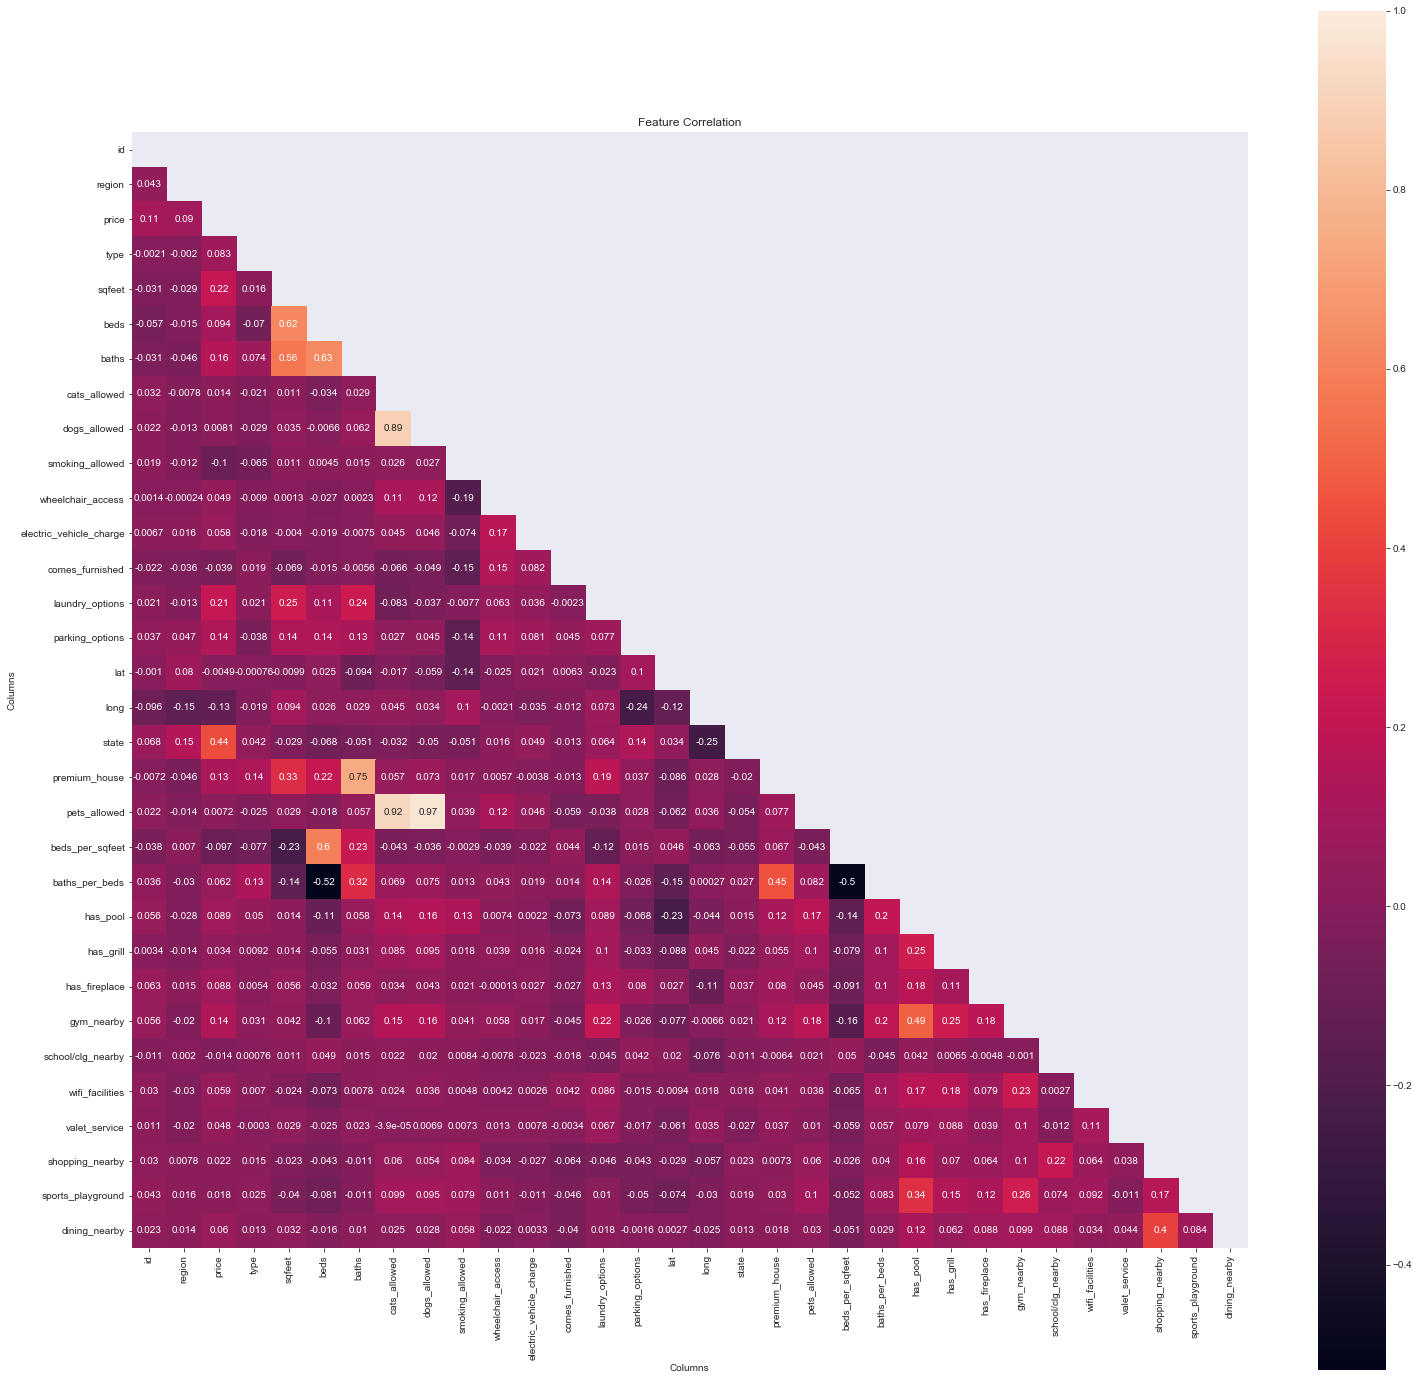

In [80]:
corr_matrix = data.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

fig, ax = plt.subplots(figsize=(25,25)) 

sns.heatmap(corr_matrix, 
            annot=True, 
            square=True,
            fmt='.2g',
            mask=mask,
            ax=ax).set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')

ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [81]:
data_final.to_csv('data_cleaned.csv', index=False)

<hr>

# Training The Model 

<hr>

In [82]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [83]:
data = pd.read_csv('data_cleaned.csv')
data.shape

(229505, 26)

In [84]:
data.head()

region     price  type    sqfeet  smoking_allowed  wheelchair_access  \
0     3.0  7.021084   3.0  7.184629              1.0                0.0   
1     3.0  6.715383   3.0  7.032624              1.0                0.0   
2     3.0  6.684612   3.0  6.831954              1.0                0.0   
3     3.0  6.665684   3.0  6.953684              1.0                0.0   
4     3.0  6.802395   3.0  7.168580              1.0                0.0   

   electric_vehicle_charge  comes_furnished  laundry_options  parking_options  \
0                      0.0              0.0              1.0              0.0   
1                      0.0              0.0              1.0              1.0   
2                      0.0              0.0              1.0              1.0   
3                      0.0              0.0              1.0              1.0   
4                      0.0              0.0              1.0              1.0   

       lat     long  premium_house  pets_allowed  beds_per_sqfeet  \
0  33.3755 -86.8045            0.0           1.0        -6.086017   
1  33.4226 -86.7065            0.0           1.0        -7.032624   
2  33.4226 -86.7065            0.0           1.0        -6.831954   
3  33.4226 -86.7065            0.0           1.0        -6.260537   
4  33.4226 -86.7065            1.0           1.0        -6.475433   

   baths_per_beds  has_pool  has_grill  has_fireplace  gym_nearby  \
0       -0.405465       0.0        0.0            0.0         0.0   
1        0.693147       1.0        1.0            1.0         1.0   
2        0.000000       1.0        1.0            1.0         1.0   
3       -0.693147       1.0        1.0            1.0         1.0   
4        0.000000       1.0        1.0            1.0         0.0   

   school/clg_nearby  wifi_facilities  valet_service  shopping_nearby  \
0                1.0              0.0            0.0              1.0   
1                1.0              0.0            1.0              1.0   
2                1.0              0.0            1.0              1.0   
3                1.0              0.0            1.0              1.0   
4                1.0              0.0            1.0              1.0   

   sports_playground  dining_nearby  
0                0.0            0.0  
1                1.0            1.0  
2                1.0            1.0  
3                1.0            1.0  
4                1.0            1.0

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                    data.drop('price',axis=1),
                                    data['price'],
                                    test_size=0.25,
                                    random_state=0)

***Data Split 1: all of our final dataset, no scaling***

In [86]:
y = data['price']
X = data.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

***Data Split 2: all of our final dataset, with scaling***


In [87]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

## Linear Regression

From our EDA, we can see that most features do not have a linear relationship with our labels (gdp_per_capita), yet we will try linear regression, and use the result as a reference (other methods should have better results).

***Model Training***

In [88]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

***Predictions***

In [89]:
lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)

***Evaluation***

Linear Regression Performance:

all features, No scaling:
MAE: 0.265674021891983
RMSE: 0.44667010167669347
R2_Score:  0.14585399138879873

all features, with scaling:
MAE: 0.2654213174309819
RMSE: 0.44661538447407306
R2_Score:  0.14606324478377508


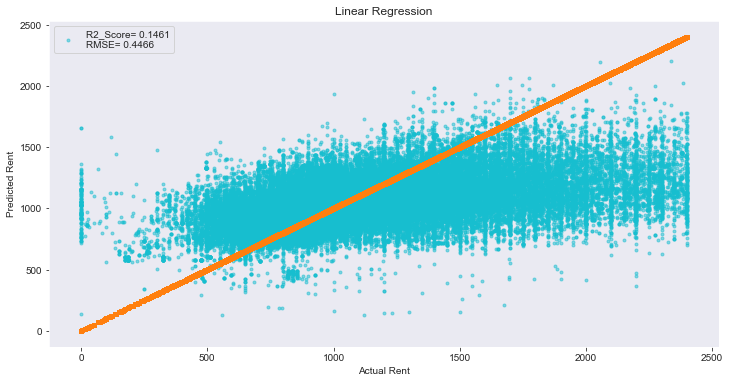

In [90]:
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lm2_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(lm2_pred), 'Actual_Rent': np.exp(y2_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha='0.5')
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y2_test, lm2_pred), 
                np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
           ],
           loc='best')
plt.title('Linear Regression')
plt.grid()
plt.show()

The orange line in the graph represents the actual rents. And the cyan circles plotted against actual rents, on the x-axis, are the predicted rents.

Linear Model worked terribly, which was expected as there were no linear relationships among the features. Feature scaling has a small positive effect on LR's prediction performance.

## Random Forest

Let's first try random forest with our data splits (with and without feature selection). Scaling the features should not affect this algorithm's performance, still we are going to test it. later we will try to improve its performance.

***Model Training***

In [91]:
rf1 = RandomForestRegressor(random_state=101, n_estimators=200)
rf2 = RandomForestRegressor(random_state=101, n_estimators=200)

rf1.fit(X_train, y_train)
rf2.fit(X2_train, y2_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)

***Predictions***

In [92]:
rf1_pred = rf1.predict(X_test)
rf2_pred = rf2.predict(X2_test)

***Evaluation***

Random Forest Performance:

all features, No scaling:
MAE: 0.061713188084745456
RMSE: 0.18956777786367815
R2_Score:  0.8461535826102313

all features, with scaling:
MAE: 0.11550715508650682
RMSE: 0.297825903078616
R2_Score:  0.6202626778611636


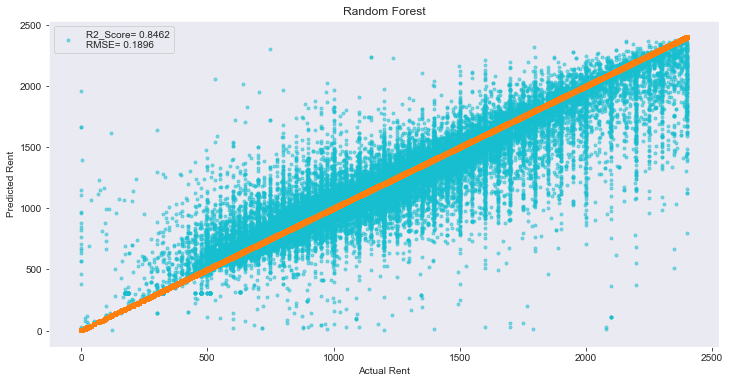

In [93]:
print('Random Forest Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, rf2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, rf2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, rf2_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(rf1_pred), 'Actual_Rent': np.exp(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha='0.5')
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, rf1_pred), 
                np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
           ],
           loc='best')
plt.title('Random Forest')
plt.grid()
plt.show()

Features without scaling gave a better result on random forest than with scaled features


***Optimization***

We will use grid search in order to obtain good parameters for our RF regressor. Of course our optimization here will be limited due to time and computing power constraints. The parameters we will optimiz are:

- n-estimators
- min_samples_leaf
- max_features
- bootstrap

In [94]:
rf_param_grid = {'max_features': ['sqrt'],
                 'min_samples_split': [4, 6],
              'min_samples_leaf': [3, 5],
              'n_estimators': [100, 200]
             }

rf_grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid = rf_param_grid,  n_jobs=-1, verbose=0)

rf_grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [95]:
rf_grid.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 200}

In [96]:
rf_grid.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [97]:
rf_grid_predictions = rf_grid.predict(X_test)

MAE: 0.08569270124682654
RMSE: 0.20383071510474998
R2_Score:  0.8221320887544943


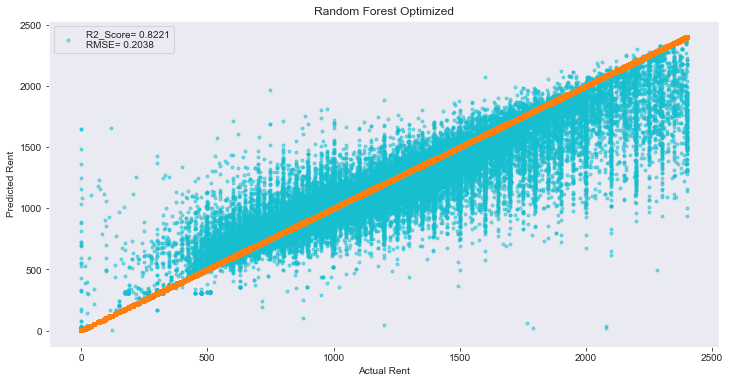

In [98]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, rf_grid_predictions))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(rf_grid_predictions), 'Actual_Rent': np.exp(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha='0.5')
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, rf_grid_predictions), 
                np.sqrt(metrics.mean_squared_error(y_test, rf_grid_predictions)))
           ],
           loc='best')
plt.title('Random Forest Optimized')
plt.grid()
plt.show()

We can see that the optimization process on RF regressor has not changed the performance in a noticebale manner, yet the slight change was actually to the worst, that is probably because our initial parameters were already very close to the optimum ones.

## Gradient Boosting

***Training***

In [99]:
gbm1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, 
                                 min_samples_leaf=1, max_depth=3, subsample=1.0, max_features= None, 
                                 random_state=101)

gbm1.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=101, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

***Predictions***

In [100]:
gbm1_pred = gbm1.predict(X_test)

***Evaluation***

Gradiant Boosting Performance:

all features, No scaling:
MAE: 0.1757443227459307
RMSE: 0.320191765419134
R2_Score:  0.5610867757022677


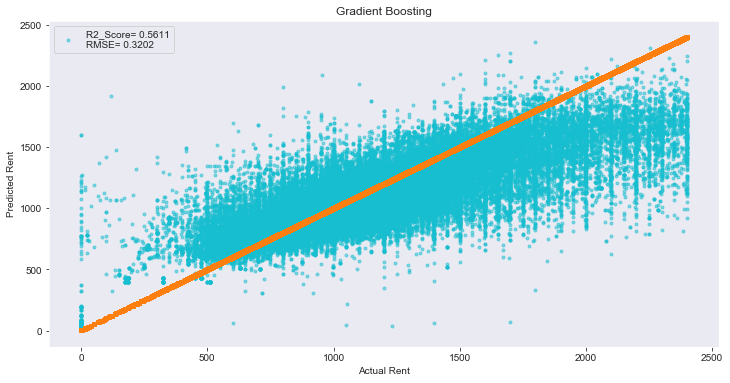

In [101]:
print('Gradiant Boosting Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, gbm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, gbm1_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(gbm1_pred), 'Actual_Rent': np.exp(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha='0.5')
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, gbm1_pred), 
                np.sqrt(metrics.mean_squared_error(y_test, gbm1_pred)))
           ],
           loc='best')
plt.title('Gradient Boosting')
plt.grid()
plt.show()

It is clear that Gradiant Boosting gave us a very poor performance, compared to Random Forest. So not opting for an optimization.

## XgBoost

***Model Training***

We will train the xgboost regressor with the default parameter values

In [102]:
xgb1 = XGBRegressor(learning_rate=0.1, n_estimators=100, 
                    min_samples_split=2, min_samples_leaf=1, 
                    max_depth=3, subsample=1.0, random_state=101)

xgb1.fit(X_train, y_train)

[07:14:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, min_samples_leaf=1, min_samples_split=2,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1.0, tree_method='exact', validate_parameters=1,
             verbosity=None)

***Predictions***

In [103]:
xgb1_pred = xgb1.predict(X_test)

***Evaluation***

XgBoost Performance:

all features, No scaling:
MAE: 0.17659367897844686
RMSE: 0.32530437497518294
R2_Score:  0.5469583222192218


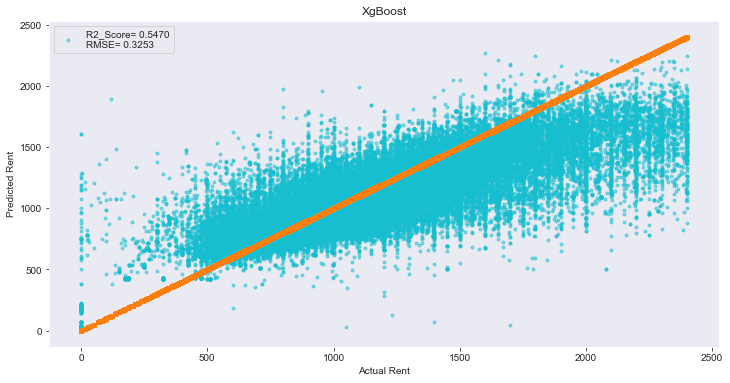

In [104]:
print('XgBoost Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, xgb1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, xgb1_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(xgb1_pred), 'Actual_Rent': np.exp(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha='0.5')
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, xgb1_pred), 
                np.sqrt(metrics.mean_squared_error(y_test, xgb1_pred)))
           ],
           loc='best')
plt.title('XgBoost')
plt.grid()
plt.show()

XgBoost also didn't do well. So will not be optimizing it any further.

## Conclusion

In this project, we used house rent dataset to build a monthly rent predictor. 4 different learning regressors (Linear Regression, Random Forest, Gradiant Boosting, and XgBoost) were tested, and we have acheived the best prediction performance using Random Forest, followed by Gradiant Boosting, and then XgBoost, while Linear Regression, acheived the worst performance of the 4.

The best prediction performance was acheived using Random Forest regressor, using all features in the dataset, and resulted in the following metrics:

- Mean Absolute Error (MAE): 0.0591
- Root mean squared error (RMSE): 0.1717
- R-squared Score (R2_Score): 0.8746